# Quantum Fourier Transform

## 1. Giriş

Fourier dönüşümü, sinyal işlemeden veri sıkıştırmaya ve karmaşıklık teorisine kadar klasik hesaplamada birçok farklı versiyonda karşımıza çıkar. Kuantum Fourier dönüşümü (QFT), dalga fonksiyonunun genlikleri üzerinde ayrık Fourier dönüşümünün kuantum uygulamasıdır. Bu, birçok kuantum algoritmasının bir parçasıdır, en önemlileri Shor'un çarpanlara ayırma algoritması ve kuantum faz tahmini algoritmasıdır. 

Ayrık Fourier dönüşümü, $(x_0, ..., x_{N-1})$ vektörü üzerinde etki eder ve onu $(y_0, ..., y_{N-1})$ vektörüne aşağıdaki formüle göre atar


$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$$


burada $\omega_N^{jk} = e^{2\pi i \frac{jk}{N}}$.

Benzer şekilde, kuantum Fourier dönüşümü bir kuantum durumu $\vert X\rangle = \sum_{j=0}^{N-1} x_j \vert j \rangle$ üzerinde etki eder ve onu aşağıdaki formüle göre kuantum durumu $\vert Y\rangle = \sum_{k=0}^{N-1} y_k \vert k \rangle$ 'ye eşler


$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$$


formülüne göre kuantum durumuna eşler. Burada $\omega_N^{jk}$ yukarıda tanımlandığı gibidir. Bu dönüşümün sadece durumun genliklerini etkilediğine dikkat edin.

Bu, harita olarak da ifade edilebilir:


$$\vert j \rangle \mapsto \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}\omega_N^{jk} \vert k \rangle$$



Veya birim matris olarak:


$$ U_{QFT} = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} \sum_{k=0}^{N-1} \omega_N^{jk} \vert k \rangle \langle j \vert$$

## 2. Sezgi <a id="intuition"></a>

Kuantum Fourier dönüşümü (QFT), hesaplama (Z) temeli ve Fourier temeli olmak üzere iki temel arasında dönüşüm gerçekleştirir. H-kapısı tek kuantum bitli QFT'dir ve Z-temel durumları $|0\rangle$ ve $|1\rangle$ ile X-temel durumları $|{+}\rangle$ ve $|{-}\rangle$ arasında dönüşüm gerçekleştirir. Aynı şekilde, hesaplama temelindeki tüm çoklu kuantum bit durumlarının Fourier temelinde karşılık gelen durumları vardır. QFT, bu temeller arasında dönüşüm gerçekleştiren basit bir işlevdir.

$$
|\text{Hesaplama Temelindeki Durum}\rangle \quad \xrightarrow[]{\text{QFT}} \quad |\text{Fourier Temelindeki Durum}\rangle
$$

$$
\text{QFT}|x\rangle = |\widetilde{x}\rangle
$$

### 2.1 Fourier bazında sayma: <a id="counting-fourier"></a>

Hesaplama temelinde, sayıları $|0\rangle$ ve $|1\rangle$ durumlarını kullanarak ikili olarak saklarız:

![zbasiscounting](images/zbasis-counting.gif)

Farklı kuantum bitlerinin değişme sıklığına dikkat edin; en soldaki kuantum biti sayı her arttığında, bir sonraki her 2 artışta, üçüncü her 4 artışta vb. değişir. Fourier temelinde, sayıları Z ekseni etrafında farklı dönüşler kullanarak saklarız:

![fbasiscounting](images/fourierbasis-counting.gif)

Saklamak istediğimiz sayı, her kuantum bitinin Z ekseni etrafında döndüğü açıyı belirler. $|\widetilde{0}\rangle$ durumunda, tüm kuantum bitleri $|{+}\rangle$ durumundadır. Yukarıdaki örnekte görüldüğü gibi, 4 kuantum bitinde $|\widetilde{5}\rangle$ durumunu kodlamak için, en soldaki kuantum bitini $\tfrac{5}{2^n} = \tfrac{5}{16}$ tam tur ($\tfrac{5}{16}\times 2\pi$ radyan) döndürdük. Bir sonraki kuantum biti bunun iki katı kadar döndürülür ($\tfrac{10}{16}\times 2\pi$ radyan veya $10/16$ tam tur), bu açı bir sonraki kuantum biti için ikiye katlanır ve böyle devam eder. 

Yine, her kuantum bitinin değişim sıklığına dikkat edin. Bu durumda en soldaki kuantum biti (`kuantum biti 0`) en düşük sıklığa, en sağdaki ise en yüksek sıklığa sahiptir.

## 3. Örnek 1: 1-qubit QFT <a id='example1'></a>

Yukarıda tanımlanan QFT operatörünün tek bir kubit durumu $\vert\psi\rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle$ üzerinde nasıl etki ettiğini düşünün. Bu durumda, $x_0 = \alpha$, $x_1 = \beta$ ve $N = 2$'dir. O halde,



$$y_0 = \frac{1}{\sqrt{2}}\left(    \alpha \exp\left(2\pi i\frac{0\times0}{2}\right) + \beta \exp\left(2\pi i\frac{1\times0}{2}\right)      \right) = \frac{1}{\sqrt{2}}\left(\alpha + \beta\right)$$



ve



$$y_1 = \frac{1}{\sqrt{2}}\left(    \alpha \exp\left(2\pi i\frac{0\times1}{2}\right) + \beta \exp\left(2\pi i\frac{1\times1}{2}\right)      \right) = \frac{1}{\sqrt{2}}\left(\alpha - \beta\right)$$



böylece nihai sonuç şu durum olur



$$U_{QFT}\vert\psi\rangle = \frac{1}{\sqrt{2}}(\alpha + \beta) \vert 0 \rangle + \frac{1}{\sqrt{2}}(\alpha - \beta)  \vert 1 \rangle$$



Bu işlem, kuantum bitine Hadamard operatörü ($H$) uygulandığında elde edilen sonuçla tam olarak aynıdır:



$$H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$



$H$ operatörünü $\vert\psi\rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle$ durumuna uygularsak, yeni durumu elde ederiz:

$$\frac{1}{\sqrt{2}}(\alpha + \beta) \vert 0 \rangle + \frac{1}{\sqrt{2}}(\alpha - \beta)  \vert 1 \rangle 
\equiv \tilde{\alpha}\vert 0 \rangle + \tilde{\beta}\vert 1 \rangle$$

Hadamard kapısının, durumun genlikleri üzerinde $N = 2$ için ayrık Fourier dönüşümünü nasıl gerçekleştirdiğine dikkat edin.

## 4. Kuantum Fourier dönüşümü<a id="qfteqn"></a>

Peki, daha büyük $N$ değerleri için kuantum Fourier dönüşümü nasıl görünür? $N=2^n$ için, $x_1$ en önemli bit olan $\vert x \rangle = \vert x_1\ldots x_n \rangle$ durumuna etki eden $QFT_N$ dönüşümünü türetelim. Bu matematik, yararlı bulanlar için burada yer almaktadır. Eğer zorlanıyorsanız endişelenmeyin; bölüm 2'deki sezgileri anladığınız sürece, doğrudan bir sonraki bölüme geçebilirsiniz.

$$
\begin{aligned}
QFT_N\vert x \rangle & = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1}\omega_N^{xy} \vert y \rangle 
\\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{2 \pi i xy / 2^n} \vert y \rangle ~\text{çünkü}\: \omega_N^{xy} = e^{2\pi i \frac{xy}{N}} \:\text{ve}\: N = 2^n 
\\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{2 \pi i \left(\sum_{k=1}^n y_k/2^k\right) x} \vert y_1 \ldots y_n \rangle \:\text{kesirli ikili gösterimde yeniden yazarak}\: y = y_1\ldots y_n, y/2^n = \sum_{k=1}^n y_k/2^k 
\\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} \prod_{k=1}^n e^{2 \pi i x y_k/2^k } \vert y_1 \ldots y_n \rangle \:\text{toplamın üstel fonksiyonunu üstel fonksiyonların çarpımı olarak genişlettikten sonra} 
\\
& = \frac{1}{\sqrt{N}} \bigotimes_{k=1}^n  \left(\vert0\rangle + e^{2 \pi i x /2^k } \vert1\rangle \right) \:\text{toplam ve çarpımları yeniden düzenledikten ve genişlettikten sonra} 
\sum_{y=0}^{N-1} = \sum_{y_1=0}^{1}\sum_{y_2=0}^{1}\ldots\sum_{y_n=0}^{1} 
\\
& = \frac{1}{\sqrt{N}}
\left(\vert0\rangle + e^{\frac{2\pi i}{2}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^2}x} \vert1\rangle\right) 
\otimes  
\ldots
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^{n-1}}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^n}x} \vert1\rangle\right) 
\end{aligned}
$$

Bu, sezgisel bölümde gördüğümüz animasyonun matematiksel açıklamasıdır:

![fbasiscounting](images/fourierbasis-counting.gif)

## 5. QFT'yi Uygulayan Devre <a name="circuit"></a>

QFT'yi uygulayan devre iki kapı kullanır. İlki, zaten bildiğiniz tek kuantum bitli Hadamard kapısı $H$'dir. Yukarıdaki [Örnek 1](#example1) bölümündeki açıklamadan, $H$'nin tek kuantum bitli durum $\vert x_k\rangle$ üzerindeki etkisinin



$$H\vert x_k \rangle = \frac{1}{\sqrt{2}}\left(\vert0\rangle + \exp\left(\frac{2\pi i}{2}x_k\right)\vert1\rangle\right)$$



İkincisi, blok diyagonal formda verilen iki kuantum bitli kontrollü dönüş $CROT_k$'dir 

$$CROT_k = \left[\begin{matrix}
I&0\\
0&UROT_k\\
\end{matrix}\right]$$

burada 

$$UROT_k = \left[\begin{matrix}
1&0\\
0&\exp\left(\frac{2\pi i}{2^k}\right)\\
\end{matrix}\right]$$

İlk kuantum bitinin kontrol, ikinci kuantum bitinin hedef olduğu iki kuantum bitli bir durum $\vert x_l x_j\rangle$ üzerinde $CROT_k$'nin etkisi şu şekilde verilir



$$CROT_k\vert 0x_j\rangle = \vert 0x_j\rangle$$


ve


$$CROT_k\vert 1x_j\rangle = \exp\left( \frac{2\pi i}{2^k}x_j \right)\vert 1x_j\rangle$$



Bu iki kapı göz önüne alındığında, [n-kuantum bitlik QFT](#qfteqn) uygulayan bir devre aşağıda gösterilmiştir.

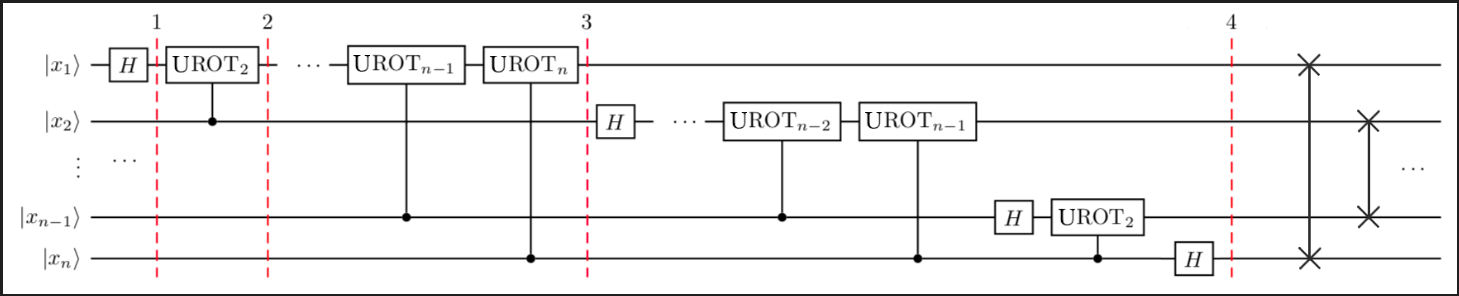

Devre şu şekilde çalışır. n-kubitlik bir giriş durumu $\vert x_1x_2\ldots x_n\rangle$ ile başlıyoruz.

<ol>
Kubit 1 üzerindeki ilk Hadamard kapısından sonra, durum giriş durumundan 

$$
H_1\vert x_1x_2\ldots x_n\rangle = 
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + \exp\left(\frac{2\pi i}{2}x_1\right)\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

Qubit 2 tarafından kontrol edilen qubit 1 üzerindeki $UROT_2$ kapısından sonra, durum şu şekilde dönüşür

$$
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + \exp\left(\frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1\right)\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

Qubit $n$ tarafından kontrol edilen qubit 1 üzerinde son $UROT_n$ kapısı uygulandıktan sonra, durum şu hale gelir:

$$
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^n}x_n + 
\frac{2\pi i}{2^{n-1}}x_{n-1} + 
\ldots + 
\frac{2\pi i}{2^2}x_2 + 
\frac{2\pi i}{2}x_1
\right)
\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

Şunu dikkate alarak 

$$
x = 2^{n-1}x_1 + 2^{n-2}x_2 + \ldots + 2^1x_{n-1} + 2^0x_n
$$

olduğunu göz önünde bulundurarak, yukarıdaki durumu şu şekilde yazabiliriz: 

$$
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^n}x 
\right)
\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

$2\ldots n$ kuantum bitleri için benzer bir kapı dizisi uygulandıktan sonra, son durumun şu şekilde olduğunu buluruz:

$$
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^n}x 
\right)
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^{n-1}}x 
\right)
\vert1\rangle\right]
\otimes
\ldots
\otimes
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^{2}}x 
\right)
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^{1}}x 
\right)
\vert1\rangle\right]
$$

Bu, <a href="#qfteqn">yukarıda</a> türetilen giriş durumunun QFT'sidir, ancak çıkış durumunda kuantum bitlerinin sırası tersine çevrilmiştir.

<ol>

## 6. Örnek 2: 3-kubit QFT <a id=‘example2’></a>

$\vert y_3y_2y_1\rangle = QFT_8\vert x_3x_2x_1\rangle$ için devre oluşturma adımları şunlardır:

<ol>

$\vert x_1 \rangle$'ye Hadamard kapısı uygulayın

$$
|\psi_1\rangle = 
\vert x_3\rangle
\otimes
\vert x_2\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(\frac{2\pi i}{2}x_1\right) 
\vert1\rangle\right]
$$

$\vert x_2\rangle$'ye bağlı olarak $\vert x_1\rangle$'ye bir $UROT_2$ kapısı uygulayın

$$
|\psi_2\rangle = 
\vert x_3\rangle
\otimes
\vert x_2\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]
$$

$\vert x_3\rangle$'ye bağlı olarak $\vert x_1\rangle$'ye bir $UROT_3$ kapısı uygulayın

$$
|\psi_3\rangle = 
\vert x_3\rangle
\otimes
\vert x_2\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]
$$

$\vert x_2 \rangle$'ye Hadamard kapısı uygulayın

$$
|\psi_4\rangle = 
\vert x_3\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2}x_2
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]
$$

$\vert x_3\rangle$'ye bağlı olarak $\vert x_2\rangle$'ye bir $UROT_2$ kapısı uygulayın

$$
|\psi_5\rangle = 
\vert x_3\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^2}x_3 + \frac{2\pi i}{2}x_2
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]
$$

$\vert x_3\rangle$'ye Hadamard kapısı uygulayın

$$
|\psi_6\rangle = 
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2}x_3
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^2}x_3 + \frac{2\pi i}{2}x_2
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]
$$


İstenen QFT'ye göre çıktı durumunun ters sırasını unutmayın. Bu nedenle, kuantum bitlerinin sırasını tersine çevirmeliyiz (bu durumda $y_1$ ve $y_3$'ü değiştirmeliyiz).

<ol>

## 7. QFT Devresinin Formu Hakkında Bazı Notlar <a id="formnote"></a>

Yukarıdaki örnek, $N=2^n$ için QFT'nin çok yararlı bir biçimini göstermektedir. Yalnızca son kuantum bitinin diğer tüm giriş kuantum bitlerinin değerlerine bağlı olduğunu ve her bir sonraki bitin giriş kuantum bitlerine giderek daha az bağlı olduğunu unutmayın. Bu, kuantum bitleri arasındaki uzak bağlantılardan daha yakın komşu bağlantılarının elde edilmesinin daha kolay olduğu QFT'nin fiziksel uygulamalarında önem kazanır.

Ek olarak, QFT devresi büyüdükçe, giderek daha hafif dönüşler yapmak için giderek daha fazla zaman harcanır. Belirli bir eşik değerinin altındaki dönüşleri göz ardı edip yine de makul sonuçlar elde edebileceğimiz ortaya çıkmıştır; buna yaklaşık QFT denir. Bu, fiziksel uygulamalarda da önemlidir, çünkü işlem sayısını azaltmak, dekoheransı ve potansiyel geçit hatalarını büyük ölçüde azaltabilir.

## 8. Qiskit Uygulaması<a id=‘implementation’></a>

Qiskit'te, yukarıdaki tartışmada kullanılan $CROT$ kapısının uygulaması, kontrollü faz dönüş kapısıdır. Bu kapı, [OpenQASM](https://github.com/QISKit/openqasm) içinde şu şekilde tanımlanmıştır

$$
CP(\theta) =
\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{i\theta}\end{bmatrix}
$$

Bu nedenle, yukarıdaki tartışmada $CROT_k$ kapısından $CP$ kapısına eşleme, aşağıdaki denklemden bulunur

$$
\theta = 2\pi/2^k = \pi/2^{k-1}
$$

In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector

$n$-qubit durumuna genelleştirmeden önce, 3-qubit durumu için ilgili kodu hesaplamak yararlıdır. Öncelikle, kuantum devremizi tanımlamalıyız:

In [2]:
qc = QuantumCircuit(3)

**Not**: Qiskit'in en düşük anlamlı bitinin en düşük indekse (0) sahip olduğunu unutmayın, bu nedenle devre, bölüm 5'teki görüntüye göre yatay olarak yansıtılacaktır. İlk olarak, kuantum bitine 2'ye bir H-kapısı uygularız:

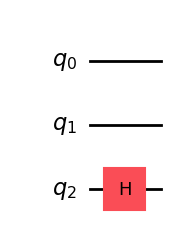

In [3]:
qc.h(2)
qc.draw(output='mpl')

Ardından, qubit 1 $|1\rangle$ durumunda ise bunu bir çeyrek tur daha çevirmek istiyoruz:

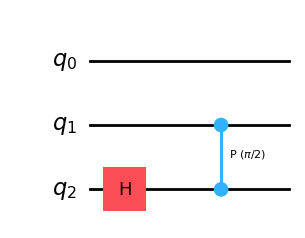

In [4]:
qc.cp(np.pi/2, 1, 2) # CROT kubit 1 ile 2 arasındaki faz farkını π/2 yapar
qc.draw(output='mpl')

Ve en düşük değerli kuantum biti (0) $|1\rangle$ ise, bir başka sekizinci dönüş:

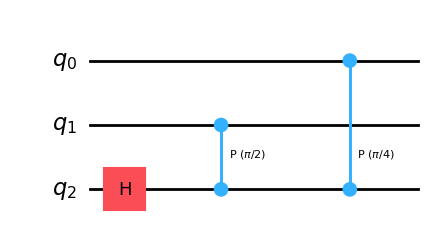

In [5]:
qc.cp(np.pi/4, 0, 2) # CROT kubit 0 ile 2 arasındaki faz farkını π/4 yapar
qc.draw(output='mpl')

With that qubit taken care of, we can now ignore it and repeat the process, using the same logic for qubits 0 and 1:

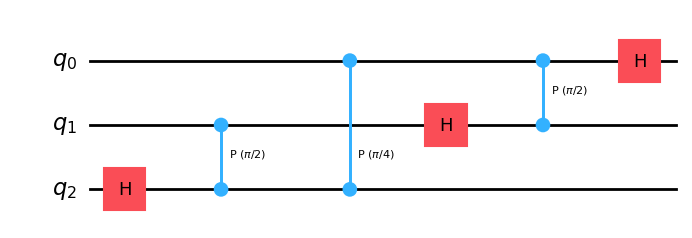

In [6]:
qc.h(1)
qc.cp(np.pi/2, 0,1) # CROT kubit 0 ile 1 arasındaki faz farkını π/2 yapar
qc.h(0)
qc.draw(output='mpl')

Son olarak, QFT'yi tamamlamak için 0 ve 2 kuantum bitlerini değiştirmeliyiz:

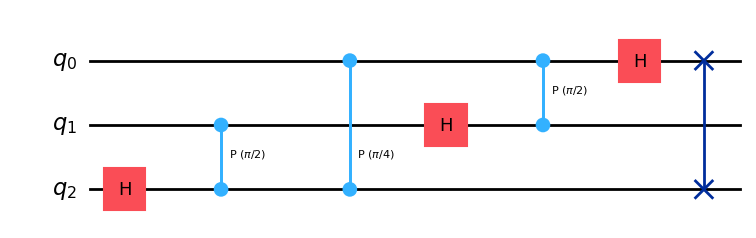

In [7]:
qc.swap(0, 2) # Kubit 0 ve 2'yi takas eder
qc.draw(output='mpl')

### 8.2 Genel QFT İşlevi <a id="generalqft"></a>

Şimdi Qiskit'te QFT için genel bir devre oluşturacağız. Qiskit, bu tür büyük genel devreleri oluşturmada gerçekten çok başarılıdır. 

QFT'yi ters çevrilmiş kuantum bitleriyle uygulayan bir devre oluşturmak, daha sonra bunları değiştirmek daha kolaydır; kuantum bitlerimizi doğru şekilde döndüren fonksiyonu oluşturarak başlayacağız. 3 kuantum bit örneğinde yaptığımız gibi, en önemli kuantum biti (en yüksek indekse sahip kuantum biti) doğru şekilde döndürerek başlayalım:

In [9]:
def qft_rotations(circuit,n):
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(np.pi/2**(n-qubit), qubit, n)

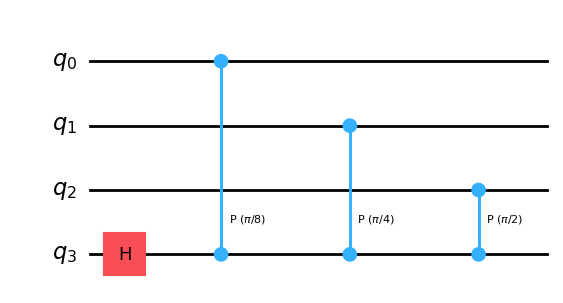

In [10]:
qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw(output='mpl')

Harika! Bu, QFT'mizin ilk kısmı. En önemli kuantum bitini doğru şekilde döndürdük, şimdi ikinci en önemli kuantum bitini doğru şekilde döndürmemiz gerekiyor. Ardından üçüncü en önemli kuantum bitini döndürmemiz gerekiyor, ve böyle devam ediyor. Ama neden daha fazla kod yazalım ki? `qft_rotations()` işlevimizin sonuna geldiğimizde, aynı kodu kullanarak işlemi sonraki `n-1` kuantum bitinde tekrarlayabiliriz:

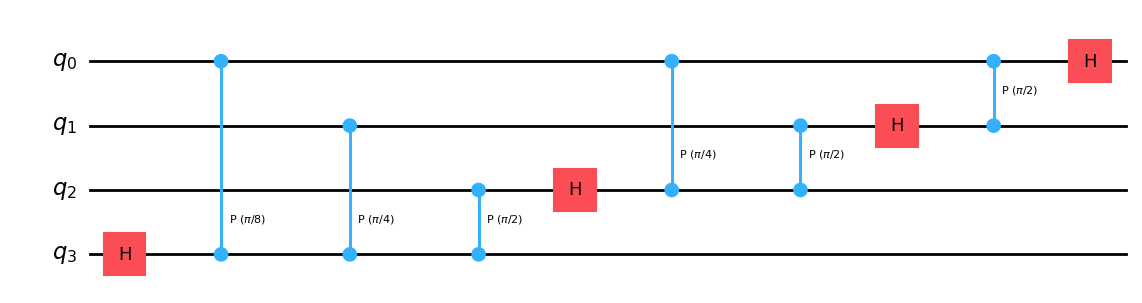

In [11]:
def qft_rotations(circuit,n):
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(np.pi/2**(n-qubit), qubit, n)

    qft_rotations(circuit, n)

qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw(output='mpl')

Son olarak, QFT tanımına uyması için QFT işlevinin sonuna takasları eklememiz gerekiyor. Bunu son işlev olan `qft()` ile birleştireceğiz:

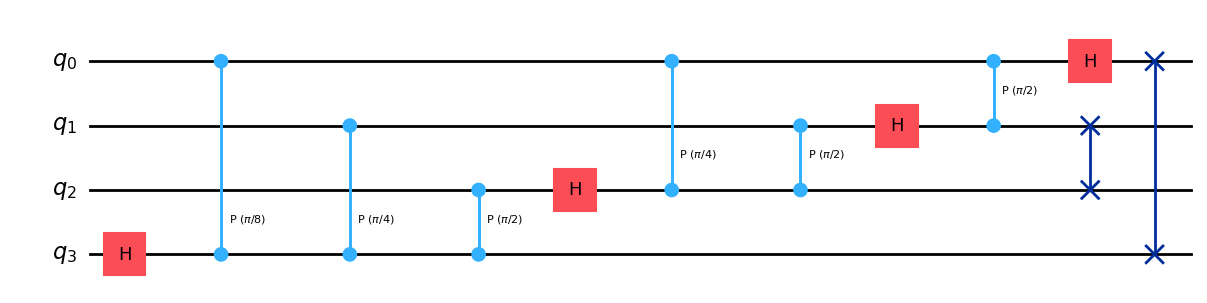

In [12]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

qc = QuantumCircuit(4)
qft(qc,4)
qc.draw(output='mpl')

Şimdi bu devrenin doğru çalıştığını göstermek istiyoruz. Bunu yapmak için önce hesaplama temelinde bir sayıyı kodlamalıyız. İkili sistemde 5 sayısının `101` olduğunu görebiliriz:

In [13]:
bin(5)

'0b101'

(`0b`, bunun ikili bir sayı olduğunu hatırlatır). Bunu kuantum bitlerimize kodlayalım:

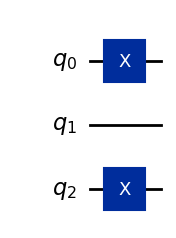

In [14]:
qc = QuantumCircuit(3)

qc.x(0)
qc.x(2)
qc.draw(output='mpl')

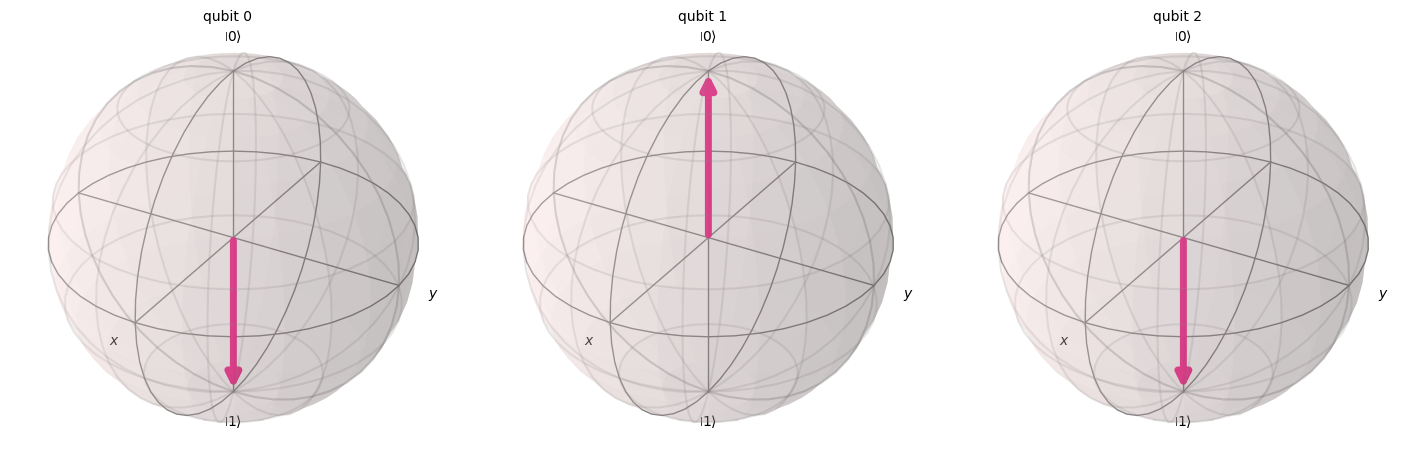

In [15]:
sim = AerSimulator()
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

Son olarak, QFT işlevimizi kullanarak kuantum bitlerimizin son durumunu görelim:

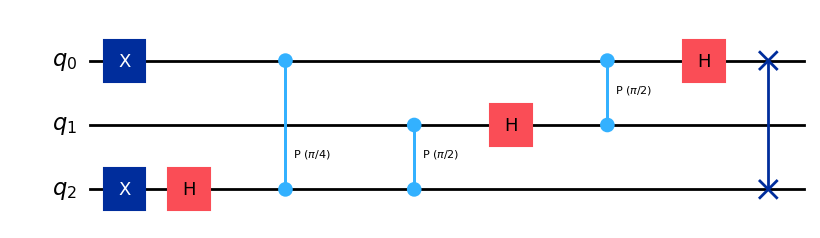

In [16]:
qft(qc,3)
qc.draw(output='mpl')

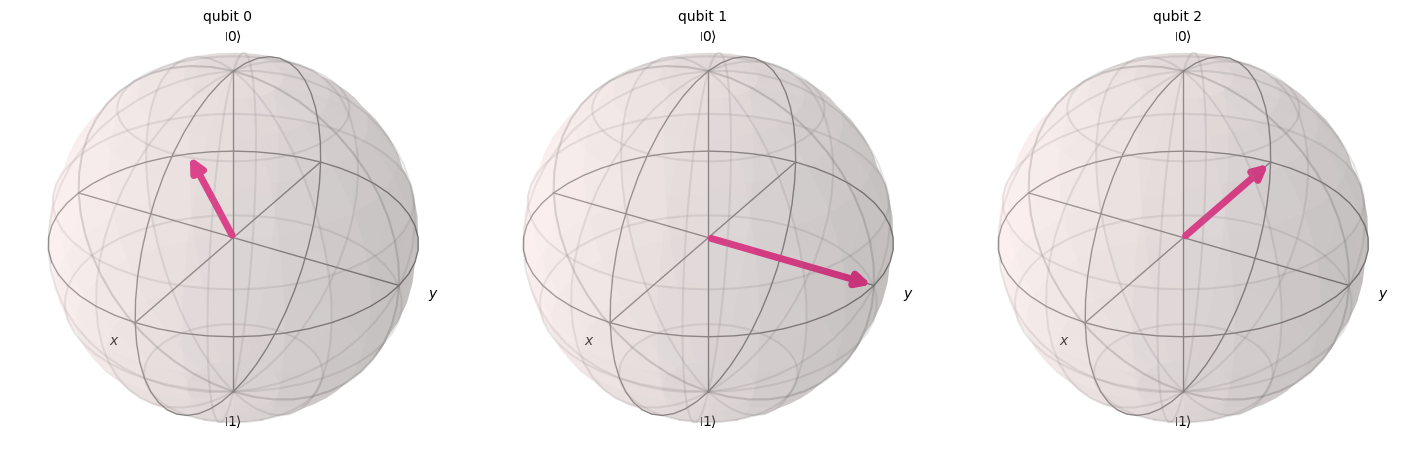

In [17]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

QFT işlevinin doğru çalıştığını görebiliriz. $|\widetilde{0}\rangle = |{+}{+}{+}\rangle$ durumuyla karşılaştırıldığında, Qubit 0 tam bir dönüşün $\tfrac{5}{8}$'i kadar, qubit 1 tam bir dönüşün $\tfrac{10}{8}$'i kadar (tam bir dönüşün $\tfrac{1}{4}$'üne eşdeğer) ve qubit 2 ise tam dönüşün $\tfrac{20}{8}$'i kadar (tam dönüşün $\tfrac{1}{2}$'sine eşdeğer) döndürülmüştür.

In [19]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

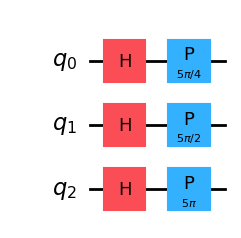

In [20]:
nqubits = 3
number = 5
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*np.pi/4,0)
qc.p(number*np.pi/2,1)
qc.p(number*np.pi,2)

qc.draw(output='mpl')

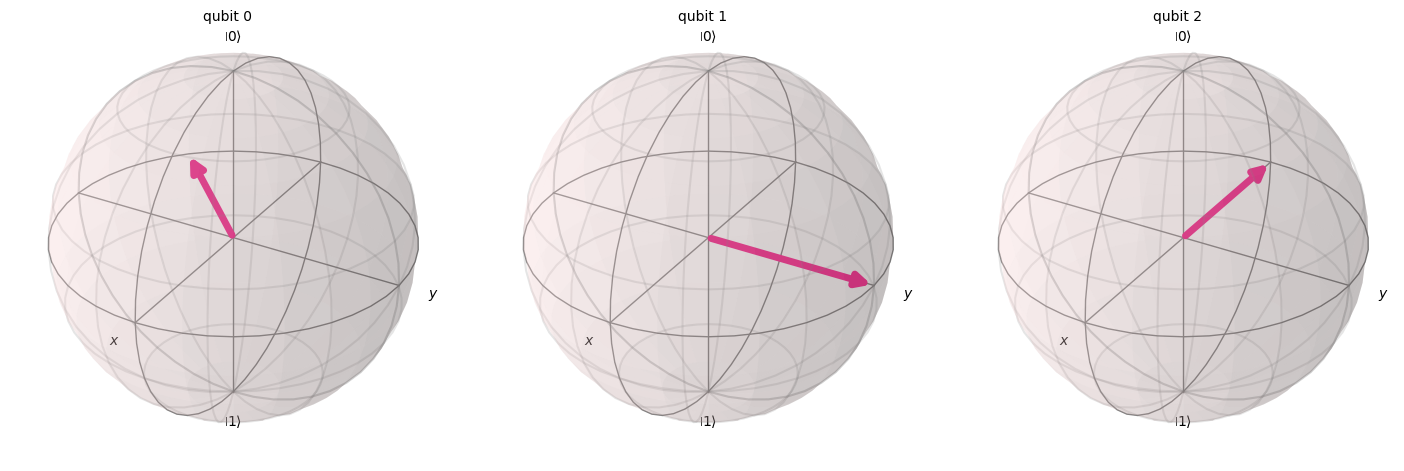

In [21]:
qc_init = qc.copy()
qc_init.save_statevector()
sim = AerSimulator()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

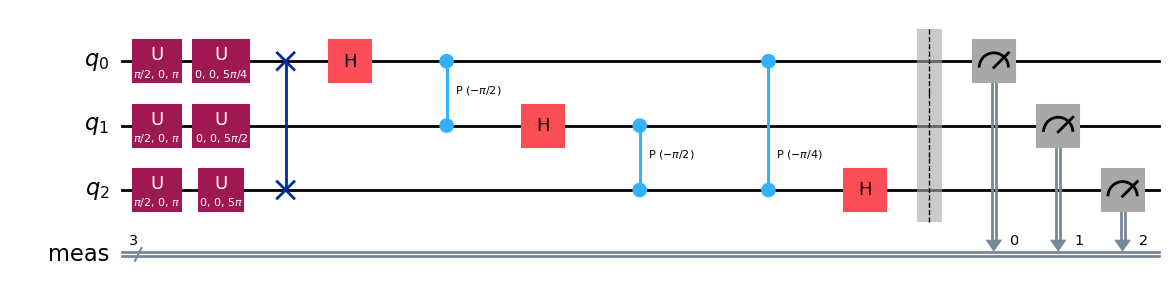

In [22]:
qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw(output='mpl')

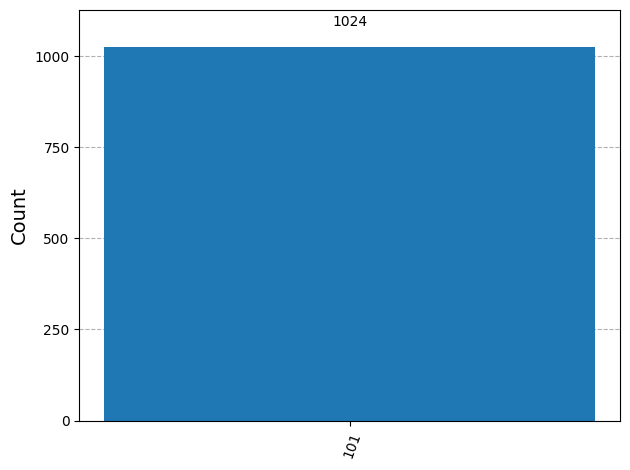

In [23]:
job = transpile(qc, sim)
counts = sim.run(job).result().get_counts()
plot_histogram(counts)